In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
import tensorflow as tf

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [6]:
x_train[0].shape

(28, 28)

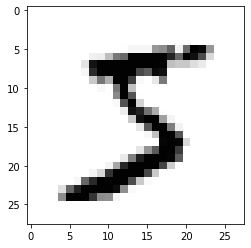

In [7]:
plt.imshow(x_train[0], cmap='Greys')

In [ ]:
# DNN

In [8]:
x_train_vec = x_train.reshape(60000, 28*28)
x_test_vec = x_test.reshape(10000, 28*28)

In [9]:
y_train_oh = utils.to_categorical(y_train)
y_test_oh = utils.to_categorical(y_test)

In [10]:
model = Sequential()
model.add(Dense(112, input_dim = 28*28, activation='relu'))
model.add(Dense(56, activation='relu'))
model.add(Dense(28, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 112)               87920     
                                                                 
 dense_1 (Dense)             (None, 56)                6328      
                                                                 
 dense_2 (Dense)             (None, 28)                1596      
                                                                 
 dense_3 (Dense)             (None, 10)                290       
                                                                 
Total params: 96,134
Trainable params: 96,134
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [13]:
hist= model.fit(x_train_vec, y_train_oh, epochs=10, batch_size=20, validation_split = 0.2)

Epoch 1/10
2400/2400 [==============================] - 7s 3ms/step - loss: 0.1700 - accuracy: 0.9532 - val_loss: 0.1716 - val_accuracy: 0.9554
Epoch 2/10
2400/2400 [==============================] - 7s 3ms/step - loss: 0.1382 - accuracy: 0.9618 - val_loss: 0.1631 - val_accuracy: 0.9565
Epoch 3/10
2400/2400 [==============================] - 6s 3ms/step - loss: 0.1161 - accuracy: 0.9672 - val_loss: 0.1399 - val_accuracy: 0.9653
Epoch 4/10
2400/2400 [==============================] - 6s 3ms/step - loss: 0.1048 - accuracy: 0.9706 - val_loss: 0.1473 - val_accuracy: 0.9622
Epoch 5/10
2400/2400 [==============================] - 6s 3ms/step - loss: 0.0934 - accuracy: 0.9744 - val_loss: 0.1395 - val_accuracy: 0.9661
Epoch 6/10
2400/2400 [==============================] - 6s 3ms/step - loss: 0.0871 - accuracy: 0.9770 - val_loss: 0.1341 - val_accuracy: 0.9674
Epoch 7/10
2400/2400 [==============================] - 7s 3ms/step - loss: 0.0780 - accuracy: 0.9793 - val_loss: 0.1202 - val_accuracy:

In [14]:
model.evaluate(x_test_vec, y_test_oh)

313/313 [==============================] - 1s 3ms/step - loss: 0.1881 - accuracy: 0.9624


[0.18811915814876556, 0.9624000191688538]

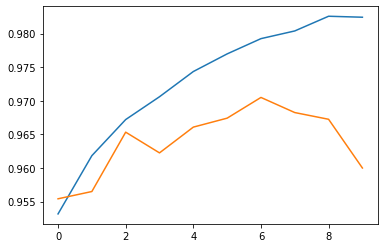

In [15]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

In [ ]:
# CNN

In [16]:
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dropout

In [17]:
x_train_cov = x_train.reshape(60000, 28, 28, 1)  # (data num, row num, col num, depth)
x_test_cov = x_test.reshape(10000, 28, 28, 1)

In [18]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               1179776   
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                      

In [19]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [20]:
hist = model.fit(x_train_cov, y_train_oh, epochs=10, batch_size=20, validation_split=0.2)

Epoch 1/10
2400/2400 [==============================] - 17s 4ms/step - loss: 0.2428 - accuracy: 0.9557 - val_loss: 0.0818 - val_accuracy: 0.9749
Epoch 2/10
2400/2400 [==============================] - 9s 4ms/step - loss: 0.0543 - accuracy: 0.9832 - val_loss: 0.0790 - val_accuracy: 0.9803
Epoch 3/10
2400/2400 [==============================] - 9s 4ms/step - loss: 0.0420 - accuracy: 0.9870 - val_loss: 0.0958 - val_accuracy: 0.9769
Epoch 4/10
2400/2400 [==============================] - 9s 4ms/step - loss: 0.0293 - accuracy: 0.9913 - val_loss: 0.0983 - val_accuracy: 0.9805
Epoch 5/10
2400/2400 [==============================] - 10s 4ms/step - loss: 0.0288 - accuracy: 0.9915 - val_loss: 0.1002 - val_accuracy: 0.9802
Epoch 6/10
2400/2400 [==============================] - 9s 4ms/step - loss: 0.0261 - accuracy: 0.9926 - val_loss: 0.0940 - val_accuracy: 0.9837
Epoch 7/10
2400/2400 [==============================] - 9s 4ms/step - loss: 0.0192 - accuracy: 0.9945 - val_loss: 0.0825 - val_accurac

In [21]:
model.evaluate(x_test_cov, y_test_oh)

313/313 [==============================] - 1s 4ms/step - loss: 0.1094 - accuracy: 0.9847


[0.10936103761196136, 0.9847000241279602]

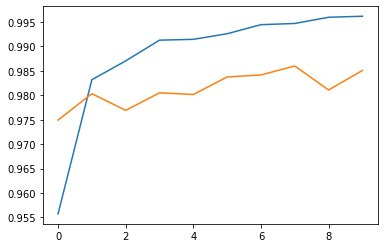

In [22]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])